In [ ]:
#Analyse des missions spatiales (1957-2020)

#Objectif : Explorer les données des missions spatiales de 1957 à 2020, afin 
#d'identifier les tendances historiques, les acteurs majeurs du domaine spatial,
#et les performances des différentes entreprises dans leurs lancements orbitaux.

In [7]:
# Importation des bibliothèques nécessaires
import pandas as pd       # Pour lire et manipuler les données
import matplotlib.pyplot as plt  # Pour créer des graphiques simples
import seaborn as sns     # Pour de beaux graphiques statistiques
import numpy as np        # Pour des calculs numériques

# Configuration de l'affichage des graphiques dans le notebook
%matplotlib inline

# Style graphique plus joli
sns.set(style="whitegrid")

# Pour ne pas avoir de messages d'avertissement gênants
import warnings
warnings.filterwarnings('ignore')


In [8]:
import os
print(os.getcwd())


C:\Users\tdegr\anaconda_projects\3d743bc1-f56f-439b-b81e-d8bf09b25f09


In [11]:
# Lecture du fichier CSV
df = pd.read_csv("space_missions.csv")

# Affichage des 5 premières lignes 
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [12]:
# Informations générales sur les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [13]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [14]:
#Observation des valeurs dans certaines colonnes
df['Status Mission'].value_counts()


Status Mission
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [15]:
df['Company Name'].value_counts().head(10)  # Top 10 entreprises


Company Name
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

In [16]:
# Nombre de valeurs manquantes par colonne
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [18]:
# Convertir la colonne 'Datum' en format datetime
df['Datum'] = pd.to_datetime(df['Datum']) 

# Vérifier si la conversion a fonctionné
df['Datum'].head()


0   2020-08-07 05:12:00+00:00
1   2020-08-06 04:01:00+00:00
2   2020-08-04 23:57:00+00:00
3   2020-07-30 21:25:00+00:00
4   2020-07-30 11:50:00+00:00
Name: Datum, dtype: datetime64[ns, UTC]

In [19]:
# Extraire l'année à partir de la date
df['Year'] = df['Datum'].dt.year

# Vérifier
df[['Datum', 'Year']].head()

,Datum,Year
0,2020-08-07 05:12:00+00:00,2020.0
1,2020-08-06 04:01:00+00:00,2020.0
2,2020-08-04 23:57:00+00:00,2020.0
3,2020-07-30 21:25:00+00:00,2020.0
4,2020-07-30 11:50:00+00:00,2020.0


In [20]:
# Comptage du nombre de missions par an
missions_par_annee = df['Year'].value_counts().sort_index()

# Afficher les 10 premières années pour vérifier
missions_par_annee.head(10)


Year
1957.0     3
1958.0    22
1959.0    20
1960.0    38
1961.0    52
1962.0    81
1963.0    38
1964.0    56
1965.0    86
1966.0    98
Name: count, dtype: int64

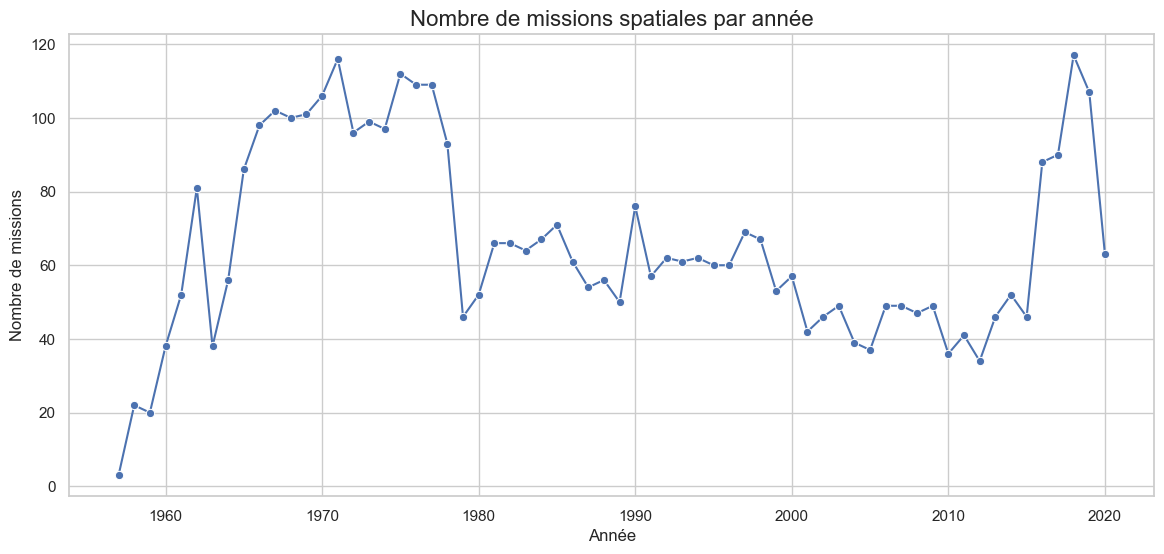

In [21]:
# Création d’un graphique simple de l’évolution des missions
plt.figure(figsize=(14, 6))  # Taille du graphique
sns.lineplot(x=missions_par_annee.index, y=missions_par_annee.values, marker="o")

# Ajout des titres
plt.title("Nombre de missions spatiales par année", fontsize=16)
plt.xlabel("Année")
plt.ylabel("Nombre de missions")
plt.grid(True)

plt.show()

#On observe une lente montée dans les années 60, une forte activité dans les
#années 80-90 et une explosion récente avec SpaceX et d'autress entreprises privées



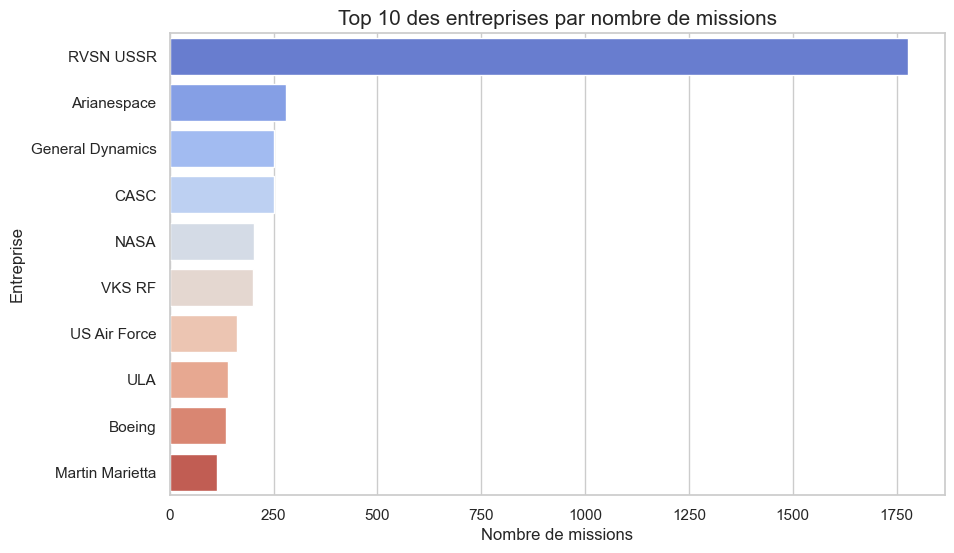

In [22]:
# Top 10 entreprises les plus actives
top_companies = df['Company Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="coolwarm")

plt.title("Top 10 des entreprises par nombre de missions", fontsize=15)
plt.xlabel("Nombre de missions")
plt.ylabel("Entreprise")
plt.show()


In [23]:
# Voir les différents statuts de mission
df['Status Mission'].value_counts()


Status Mission
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

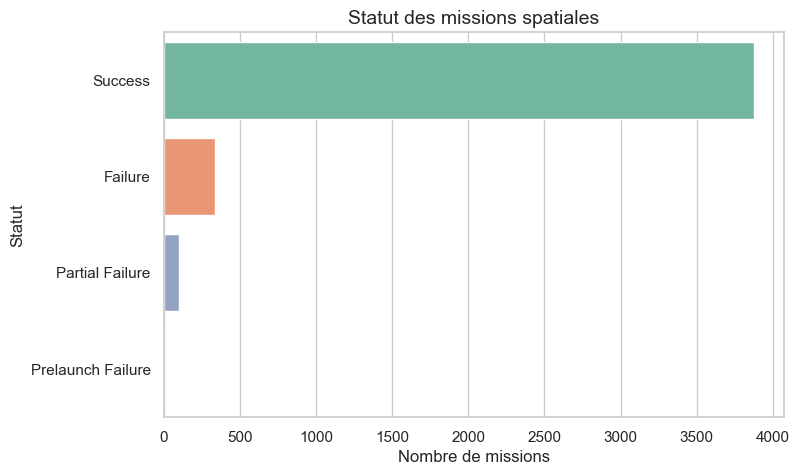

In [24]:
# Compter les statuts
statut_counts = df['Status Mission'].value_counts()

# Graphique en barres
plt.figure(figsize=(8, 5))
sns.barplot(x=statut_counts.values, y=statut_counts.index, palette="Set2")

plt.title("Statut des missions spatiales", fontsize=14)
plt.xlabel("Nombre de missions")
plt.ylabel("Statut")
plt.show()


In [27]:
# Calcul du taux de succès en pourcentage
total = len(df)
success = df[df['Status Mission'] == 'Success'].shape[0]
taux_succes = (success / total) * 100

print(f"Taux de succès global : {taux_succes:.2f}%")


Taux de succès global : 89.71%


In [28]:
# Extraire le pays (dernière partie de la chaîne de caractères)
df['Pays'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

# Voir les 10 pays les plus actifs
df['Pays'].value_counts().head(10)


Pays
Russia           1395
USA              1344
Kazakhstan        701
France            303
China             268
Japan             126
India              76
Pacific Ocean      36
Iran               13
New Zealand        13
Name: count, dtype: int64

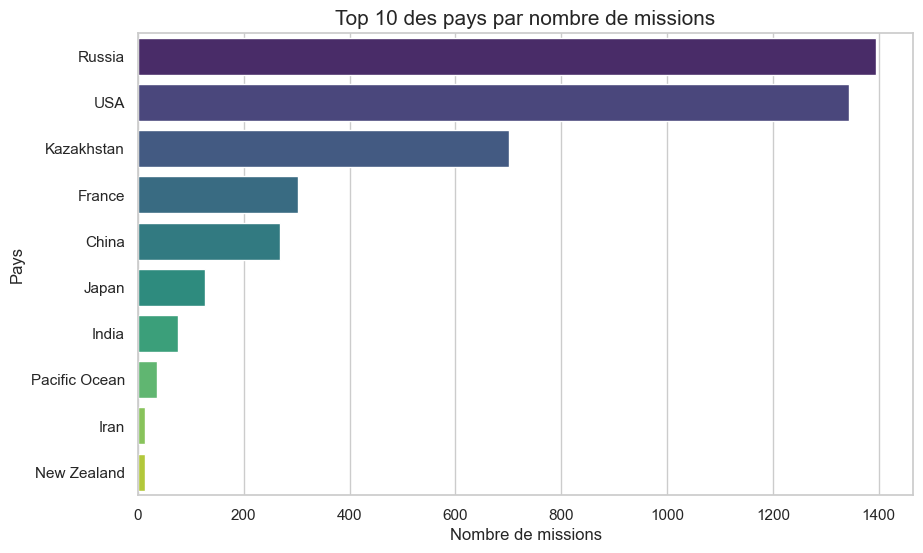

In [29]:
# Top 10 pays
top_pays = df['Pays'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_pays.values, y=top_pays.index, palette="viridis")

plt.title("Top 10 des pays par nombre de missions", fontsize=15)
plt.xlabel("Nombre de missions")
plt.ylabel("Pays")
plt.show()


In [31]:
# Filtrage pour SpaceX
df_spacex = df[df['Company Name'].str.contains("SpaceX", case=False, na=False)]

# Filtrage pour NASA (même si parfois c’est mixte avec d'autres agences)
df_nasa = df[df['Company Name'].str.contains("NASA", case=False, na=False)]


In [32]:
print(f"Nombre de missions SpaceX : {len(df_spacex)}")
print(f"Nombre de missions NASA : {len(df_nasa)}")


Nombre de missions SpaceX : 100
Nombre de missions NASA : 203


In [33]:
# Taux de succès SpaceX
succes_spacex = df_spacex[df_spacex['Status Mission'] == 'Success'].shape[0]
taux_spacex = succes_spacex / len(df_spacex) * 100

# Taux de succès NASA
succes_nasa = df_nasa[df_nasa['Status Mission'] == 'Success'].shape[0]
taux_nasa = succes_nasa / len(df_nasa) * 100

print(f"Taux de succès SpaceX : {taux_spacex:.2f}%")
print(f"Taux de succès NASA : {taux_nasa:.2f}%")


Taux de succès SpaceX : 94.00%
Taux de succès NASA : 91.63%


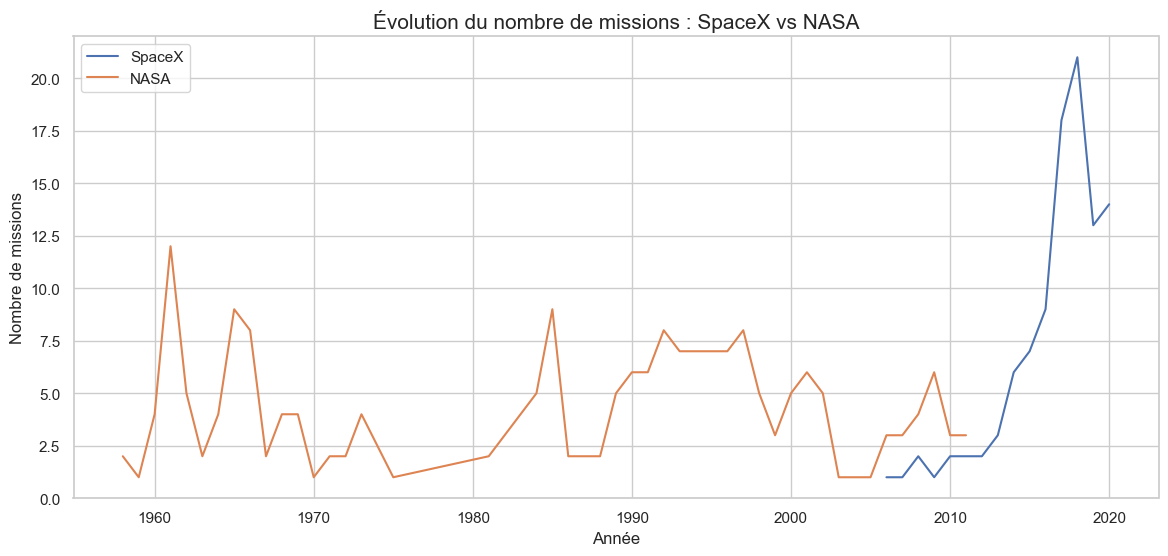

In [34]:
# Regrouper par année pour chaque entreprise
missions_spacex_par_an = df_spacex['Year'].value_counts().sort_index()
missions_nasa_par_an = df_nasa['Year'].value_counts().sort_index()

# Graphique comparatif
plt.figure(figsize=(14, 6))
sns.lineplot(x=missions_spacex_par_an.index, y=missions_spacex_par_an.values, label="SpaceX")
sns.lineplot(x=missions_nasa_par_an.index, y=missions_nasa_par_an.values, label="NASA")

plt.title("Évolution du nombre de missions : SpaceX vs NASA", fontsize=15)
plt.xlabel("Année")
plt.ylabel("Nombre de missions")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Échecs chez SpaceX
print("Échecs SpaceX :")
print(df_spacex[df_spacex['Status Mission'] != 'Success']['Status Mission'].value_counts())

# Échecs chez NASA
print("Échecs NASA :")
print(df_nasa[df_nasa['Status Mission'] != 'Success']['Status Mission'].value_counts())


Échecs SpaceX :
Status Mission
Failure              4
Prelaunch Failure    1
Partial Failure      1
Name: count, dtype: int64
Échecs NASA :
Status Mission
Failure            11
Partial Failure     6
Name: count, dtype: int64


In [ ]:
#Obervations
#SpaceX a réalisé 100 missions entre 2006 et 2020, avec un taux de succès de 94%
#NASA a lancé 203 missions spatiales entre 1958 et 2020, avec un taux de succès de
#91,63%

#Depuis 2010, on note une montée en puissance rapide  de SpaceX, acteur récent. 
#Malgré quelques échecs initiaux pour cette entreprise, le taux de réussite élevé
#illustre sa maturité technologique. Quant à la NASA, pionnère des débuts de la
#conquête spatiale, son activité intense se situe principalement durant les années
#60 à 90.
